## TRABAJO PRÁCTICO 1

Hecho por: Benjamin Kapustiansky y Oliver Safdieh

In [470]:
%pip install pandas
%pip install matplotlib
%pip install scikit-learn
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [471]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Decision Tree CLassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_score, roc_curve

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression

SEED = 42

In [472]:
archivo = "top5-players.csv"

# Leer datos del archivo
ds = pd.read_csv(archivo)
ds

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,23.0,2000.0,20,13,...,0.00,0.07,0.07,0.00,0.07,0.00,0.06,0.06,0.00,0.06
1,2,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,22.0,2000.0,30,14,...,0.14,0.14,0.28,0.14,0.28,0.14,0.13,0.27,0.14,0.27
2,3,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,19.0,2003.0,7,1,...,0.00,0.89,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19
3,4,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,17.0,2006.0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,5,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,35.0,1987.0,31,31,...,0.13,0.00,0.13,0.10,0.10,0.11,0.01,0.12,0.09,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2847,2848,Lovro Zvonarek,hr CRO,"FW,MF",Bayern Munich,de Bundesliga,18.0,2005.0,5,1,...,0.55,0.00,0.55,0.55,0.55,0.04,0.12,0.15,0.04,0.15
2848,2849,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,24.0,1998.0,35,35,...,0.23,0.29,0.52,0.17,0.47,0.22,0.28,0.50,0.17,0.45
2849,2850,Milan Đurić,ba BIH,FW,Hellas Verona,it Serie A,33.0,1990.0,20,13,...,0.37,0.07,0.45,0.30,0.37,0.34,0.09,0.43,0.16,0.25
2850,2851,Milan Đurić,ba BIH,FW,Monza,it Serie A,33.0,1990.0,17,13,...,0.29,0.07,0.36,0.29,0.36,0.21,0.05,0.26,0.21,0.26


In [473]:
ds.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt',
       'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'Gls_90', 'Ast_90', 'G+A_90', 'G-PK_90', 'G+A-PK_90', 'xG_90', 'xAG_90',
       'xG+xAG_90', 'npxG_90', 'npxG+xAG_90'],
      dtype='object')

In [474]:
dsNum= ds[["Age", "Ast", "Ast_90"]]
dsNum

,Age,Ast,Ast_90
0,23.0,1,0.07
1,22.0,2,0.14
2,19.0,1,0.89
3,17.0,0,0.00
4,35.0,0,0.00
...,...,...,...
2847,18.0,0,0.00
2848,24.0,10,0.29
2849,33.0,1,0.07
2850,33.0,1,0.07


In [475]:
dsNum.head()

,Age,Ast,Ast_90
0,23.0,1,0.07
1,22.0,2,0.14
2,19.0,1,0.89
3,17.0,0,0.00
4,35.0,0,0.00


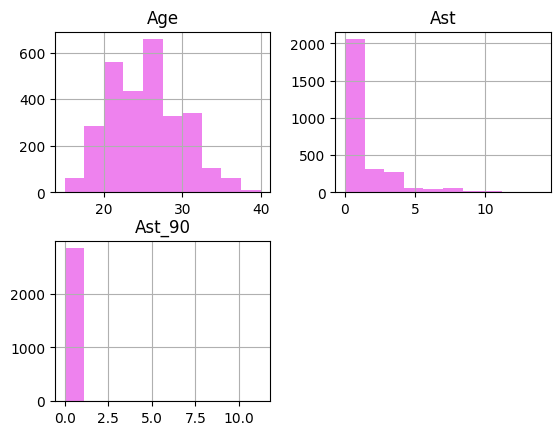

In [476]:
dsNum.hist(color="violet")
plt.show()

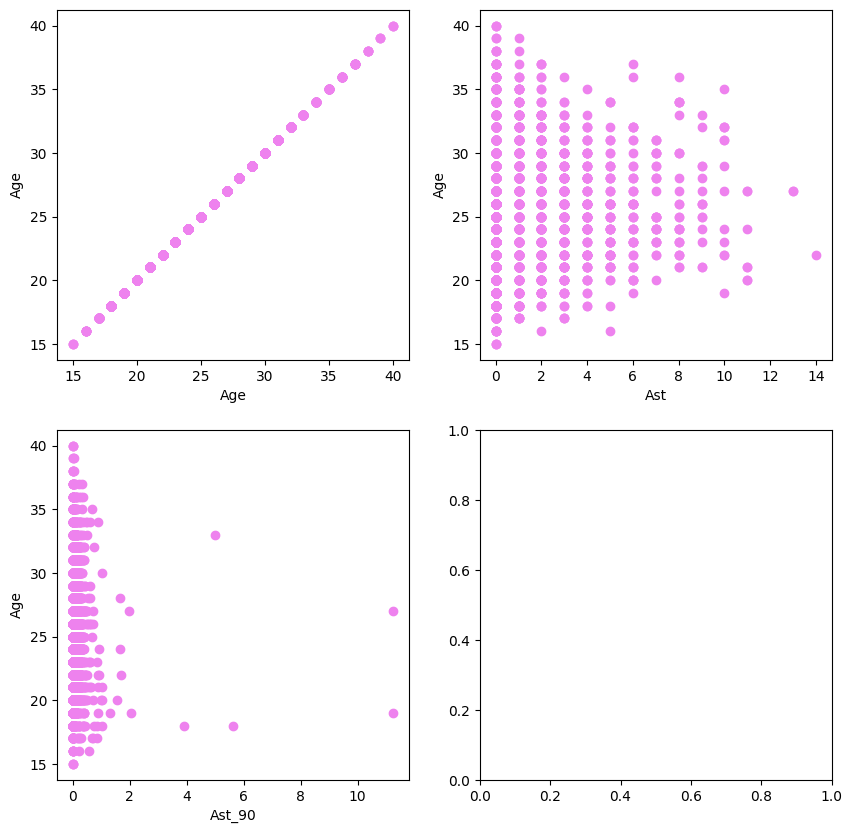

In [477]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i, e in enumerate(dsNum[["Age", "Ast", "Ast_90"]]):
    axs[i // 2, i % 2].scatter(dsNum[e], dsNum["Age"], color="violet")
    axs[i // 2, i % 2].set_xlabel(e)
    axs[i // 2, i % 2].set_ylabel("Age")

Text(0.5, 1.0, 'Age')

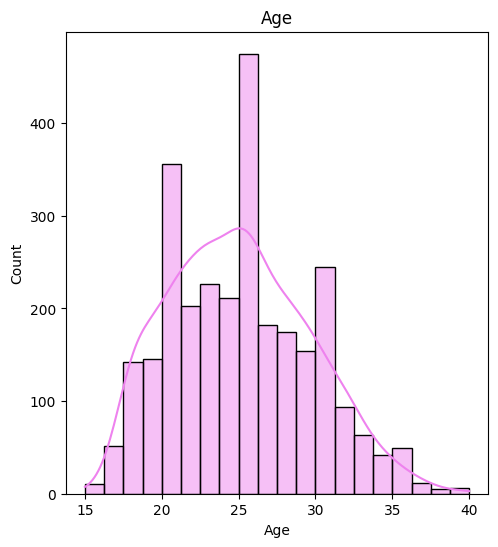

In [478]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(dsNum["Age"], bins=20, kde=True, color="violet")
plt.title("Age")

Text(0.5, 1.0, 'Ast')

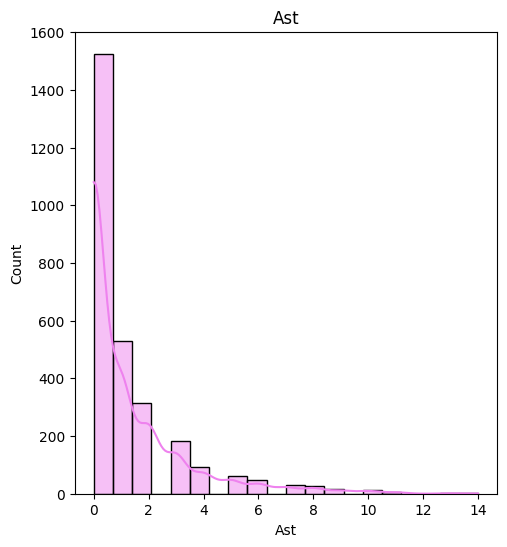

In [479]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(dsNum["Ast"], bins=20, kde=True, color="violet")
plt.title("Ast")

# Train Test split

In [480]:
X = ds[["Age", "Ast", "Ast_90"]]  # Features
y = ds["Gls"] > ds["Gls"].mean()

X = X.fillna(0)

X, y

(       Age  Ast  Ast_90
 0     23.0    1    0.07
 1     22.0    2    0.14
 2     19.0    1    0.89
 3     17.0    0    0.00
 4     35.0    0    0.00
 ...    ...  ...     ...
 2847  18.0    0    0.00
 2848  24.0   10    0.29
 2849  33.0    1    0.07
 2850  33.0    1    0.07
 2851  20.0    0    0.00
 
 [2852 rows x 3 columns],
 0       False
 1        True
 2       False
 3       False
 4        True
         ...  
 2847    False
 2848     True
 2849     True
 2850     True
 2851    False
 Name: Gls, Length: 2852, dtype: bool)

In [481]:
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(2852, 3)


((2281, 3), (571, 3), (2281,), (571,))

# Logistic Regression (numerical tree)

## Training

In [482]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train.values.ravel())

LogisticRegression()

## Prediction

In [483]:
y_pred = log_model.predict(X_test)

In [484]:
y_test.value_counts()

Gls
False    405
True     166
Name: count, dtype: int64

## Confusion Matrix

Accuracy: 0.7740805604203153


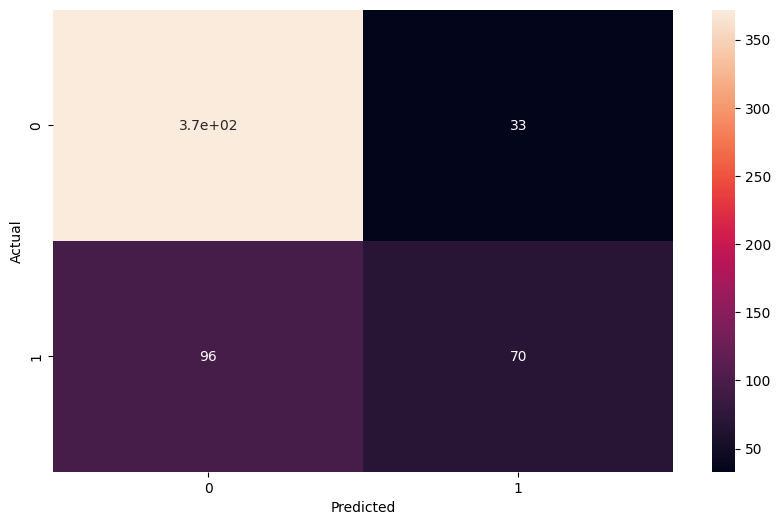

In [485]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, ax=ax)
_ = plt.xlabel("Predicted")
_ = plt.ylabel("Actual")

## ROC AUC

In [486]:
ROC_AUC_SCORE1 = roc_auc_score(y_test, y_pred)
ROC_AUC_SCORE1

np.float64(0.6701026327532351)

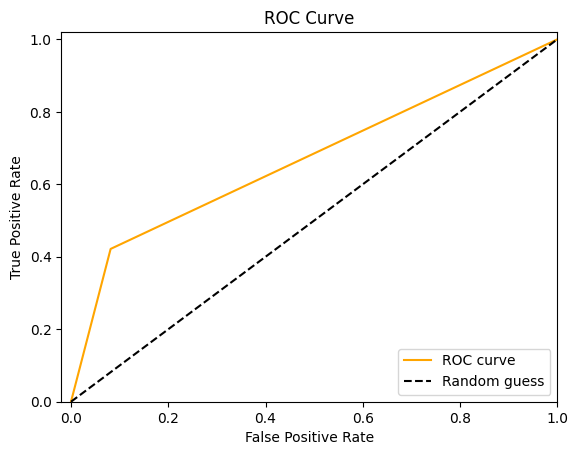

In [487]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC curve', color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")
plt.show()

## Accuracy

In [488]:
accuracy1 = accuracy_score(y_test, y_pred)
accuracy1

0.7740805604203153

## Precision

In [489]:
precision1 = precision_score(y_test, y_pred)
precision1

np.float64(0.6796116504854369)

## Feature Importances 

In [490]:
abs(log_model.coef_)

array([[0.02849493, 0.75953901, 1.29964001]])

In [491]:
X_train.columns

Index(['Age', 'Ast', 'Ast_90'], dtype='object')

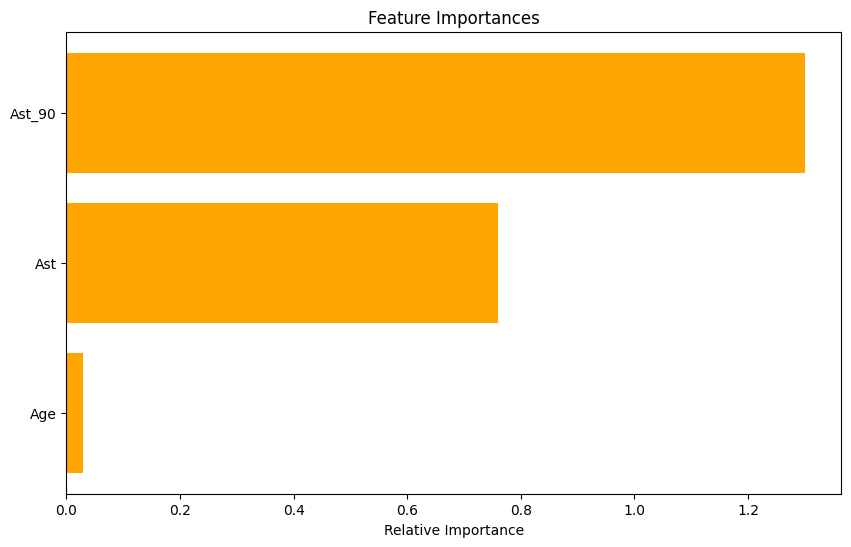

In [492]:
importances = abs(log_model.coef_)[::-1]
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(X_train.shape[1]), importances[0], align="center", color='orange')
plt.yticks(range(X_train.shape[1]), X_train.columns)
plt.xlabel("Relative Importance")
plt.show()

# Decision tree (numeral tree)

## Training

In [493]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

## Prediction

In [494]:
y_pred = dt_model.predict(X_test)

In [495]:
y_test.value_counts()

Gls
False    405
True     166
Name: count, dtype: int64

## Confusion Matrix

Accuracy: 0.7443082311733801
              precision    recall  f1-score   support

       False       0.79      0.88      0.83       405
        True       0.58      0.42      0.49       166

    accuracy                           0.74       571
   macro avg       0.69      0.65      0.66       571
weighted avg       0.73      0.74      0.73       571



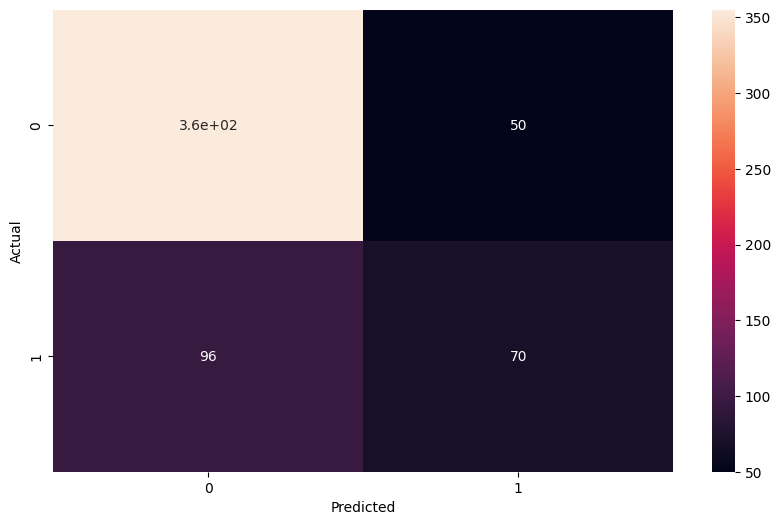

In [496]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, ax=ax)
_ = plt.xlabel("Predicted")
_ = plt.ylabel("Actual")

print(classification_report(y_test, y_pred))

## ROC AUC

In [497]:
ROC_AUC_SCORE2 = roc_auc_score(y_test, y_pred)
ROC_AUC_SCORE2

np.float64(0.6491149784322475)

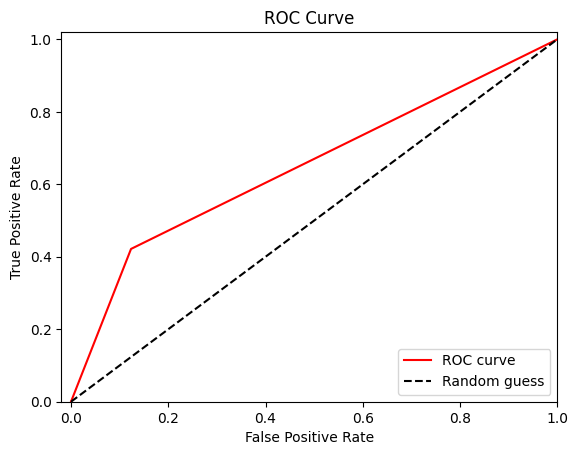

In [498]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC curve', color='r')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")
plt.show()

## Accuracy

In [499]:
accuracy2 = accuracy_score(y_test, y_pred)
accuracy2

0.7443082311733801

## Precision

In [500]:
precision2 = precision_score(y_test, y_pred)
precision2

np.float64(0.5833333333333334)

## Feature Importances

In [501]:
X_train.columns

Index(['Age', 'Ast', 'Ast_90'], dtype='object')

In [502]:
dt_model.feature_importances_

array([0.24420268, 0.44450389, 0.31129343])

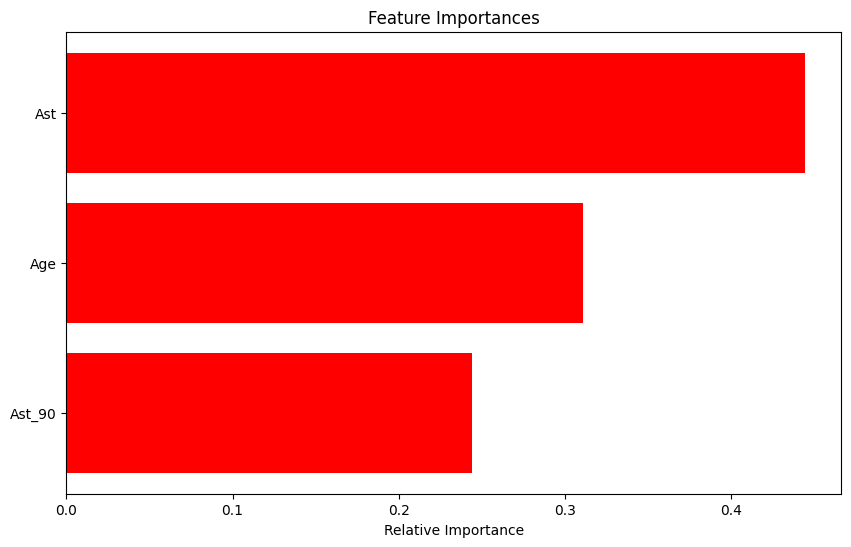

In [503]:
importances = dt_model.feature_importances_[::-1]
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(X_train.shape[1]), importances[indices], align="center", color="r")
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlabel("Relative Importance")
plt.show()

## One Hot Encoding

In [504]:
ds = pd.read_csv("top5-players.csv")

# Posiciones (Pos)
ds = pd.get_dummies(ds, columns=["Pos"])

# Ligas (Comp)
ds = pd.get_dummies(ds, columns=["Comp"])

ds


,Rk,Player,Nation,Squad,Age,Born,MP,Starts,Min,90s,...,"Pos_FW,MF",Pos_GK,Pos_MF,"Pos_MF,DF","Pos_MF,FW",Comp_de Bundesliga,Comp_eng Premier League,Comp_es La Liga,Comp_fr Ligue 1,Comp_it Serie A
0,1,Max Aarons,eng ENG,Bournemouth,23.0,2000.0,20,13,1237,13.7,...,False,False,False,False,False,False,True,False,False,False
1,2,Brenden Aaronson,us USA,Union Berlin,22.0,2000.0,30,14,1267,14.1,...,False,False,False,False,True,True,False,False,False,False
2,3,Paxten Aaronson,us USA,Eint Frankfurt,19.0,2003.0,7,1,101,1.1,...,False,False,True,False,False,True,False,False,False,False
3,4,Keyliane Abdallah,fr FRA,Marseille,17.0,2006.0,1,0,4,0.0,...,False,False,False,False,False,False,False,False,True,False
4,5,Yunis Abdelhamid,ma MAR,Reims,35.0,1987.0,31,31,2781,30.9,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2847,2848,Lovro Zvonarek,hr CRO,Bayern Munich,18.0,2005.0,5,1,163,1.8,...,True,False,False,False,False,True,False,False,False,False
2848,2849,Martin Ødegaard,no NOR,Arsenal,24.0,1998.0,35,35,3091,34.3,...,False,False,True,False,False,False,True,False,False,False
2849,2850,Milan Đurić,ba BIH,Hellas Verona,33.0,1990.0,20,13,1204,13.4,...,False,False,False,False,False,False,False,False,False,True
2850,2851,Milan Đurić,ba BIH,Monza,33.0,1990.0,17,13,1257,14.0,...,False,False,False,False,False,False,False,False,False,True


In [505]:
ds.columns

Index(['Rk', 'Player', 'Nation', 'Squad', 'Age', 'Born', 'MP', 'Starts', 'Min',
       '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG',
       'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'Gls_90', 'Ast_90',
       'G+A_90', 'G-PK_90', 'G+A-PK_90', 'xG_90', 'xAG_90', 'xG+xAG_90',
       'npxG_90', 'npxG+xAG_90', 'Pos_DF', 'Pos_DF,FW', 'Pos_DF,MF', 'Pos_FW',
       'Pos_FW,DF', 'Pos_FW,MF', 'Pos_GK', 'Pos_MF', 'Pos_MF,DF', 'Pos_MF,FW',
       'Comp_de Bundesliga', 'Comp_eng Premier League', 'Comp_es La Liga',
       'Comp_fr Ligue 1', 'Comp_it Serie A'],
      dtype='object')

## Train Test Split

In [506]:
X = ds[["Age", "Ast", "Ast_90", "Pos_DF", "Pos_DF,FW", "Pos_DF,MF", "Pos_FW",
       "Pos_FW,DF", "Pos_FW,MF", "Pos_GK", "Pos_MF", "Pos_MF,DF", "Pos_MF,FW",
       "Comp_de Bundesliga", "Comp_eng Premier League", "Comp_es La Liga",
       "Comp_fr Ligue 1", "Comp_it Serie A"]]  # Features
y = ds["Gls"] > ds["Gls"].mean()

X = X.fillna(0)

X, y

(       Age  Ast  Ast_90  Pos_DF  Pos_DF,FW  Pos_DF,MF  Pos_FW  Pos_FW,DF  \
 0     23.0    1    0.07    True      False      False   False      False   
 1     22.0    2    0.14   False      False      False   False      False   
 2     19.0    1    0.89   False      False      False   False      False   
 3     17.0    0    0.00   False      False      False    True      False   
 4     35.0    0    0.00    True      False      False   False      False   
 ...    ...  ...     ...     ...        ...        ...     ...        ...   
 2847  18.0    0    0.00   False      False      False   False      False   
 2848  24.0   10    0.29   False      False      False   False      False   
 2849  33.0    1    0.07   False      False      False    True      False   
 2850  33.0    1    0.07   False      False      False    True      False   
 2851  20.0    0    0.00   False      False      False   False      False   
 
       Pos_FW,MF  Pos_GK  Pos_MF  Pos_MF,DF  Pos_MF,FW  Comp_de Bundesliga

In [507]:
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(2852, 18)


((2281, 18), (571, 18), (2281,), (571,))

# Logistic Regresion (categorical tree)

## Training

In [508]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train.values.ravel())

c:\Users\48521682\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Prediction

In [509]:
y_pred = log_model.predict(X_test)

In [510]:
y_test.value_counts()

Gls
False    405
True     166
Name: count, dtype: int64

## Confusion Matrix

Accuracy: 0.809106830122592


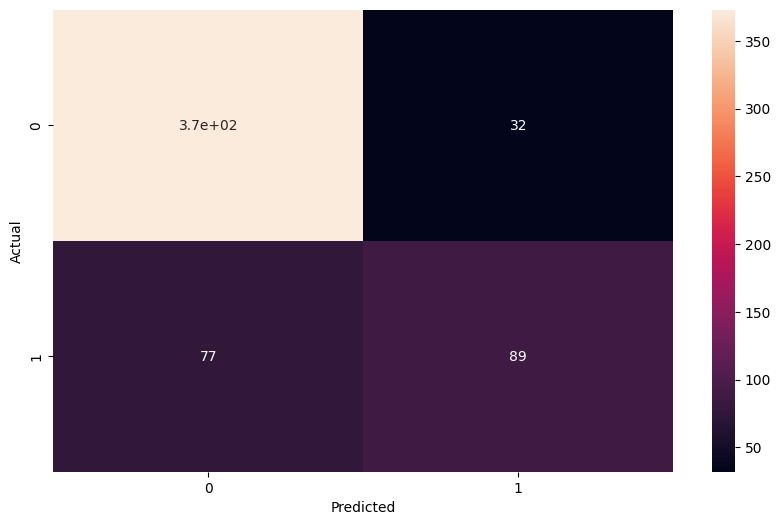

In [511]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, ax=ax)
_ = plt.xlabel("Predicted")
_ = plt.ylabel("Actual")

## ROC AUC

In [512]:
ROC_AUC_SCORE3 = roc_auc_score(y_test, y_pred)
ROC_AUC_SCORE3

np.float64(0.7285661163171203)

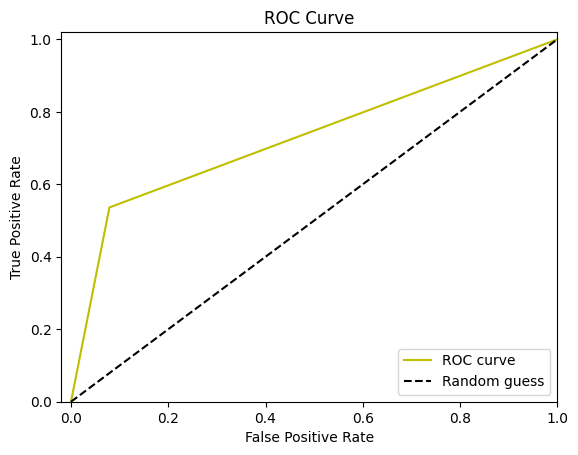

In [513]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC curve', color='y')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")
plt.show()

## Accuracy

In [514]:
accuracy3 = accuracy_score(y_test, y_pred)
accuracy3

0.809106830122592

## Precision

In [515]:
precision3 = precision_score(y_test, y_pred)
precision3

np.float64(0.7355371900826446)

## Feature Importances

In [516]:
abs(log_model.coef_)

array([[0.06833327, 0.75831545, 2.21741746, 0.45451394, 0.71328524,
        0.63171709, 1.28027857, 0.3868256 , 1.2828159 , 2.68548801,
        0.09119541, 0.12398445, 0.59518985, 0.2615535 , 0.28953407,
        0.61196847, 0.38982877, 0.37584062]])

In [517]:
X_train.columns

Index(['Age', 'Ast', 'Ast_90', 'Pos_DF', 'Pos_DF,FW', 'Pos_DF,MF', 'Pos_FW',
       'Pos_FW,DF', 'Pos_FW,MF', 'Pos_GK', 'Pos_MF', 'Pos_MF,DF', 'Pos_MF,FW',
       'Comp_de Bundesliga', 'Comp_eng Premier League', 'Comp_es La Liga',
       'Comp_fr Ligue 1', 'Comp_it Serie A'],
      dtype='object')

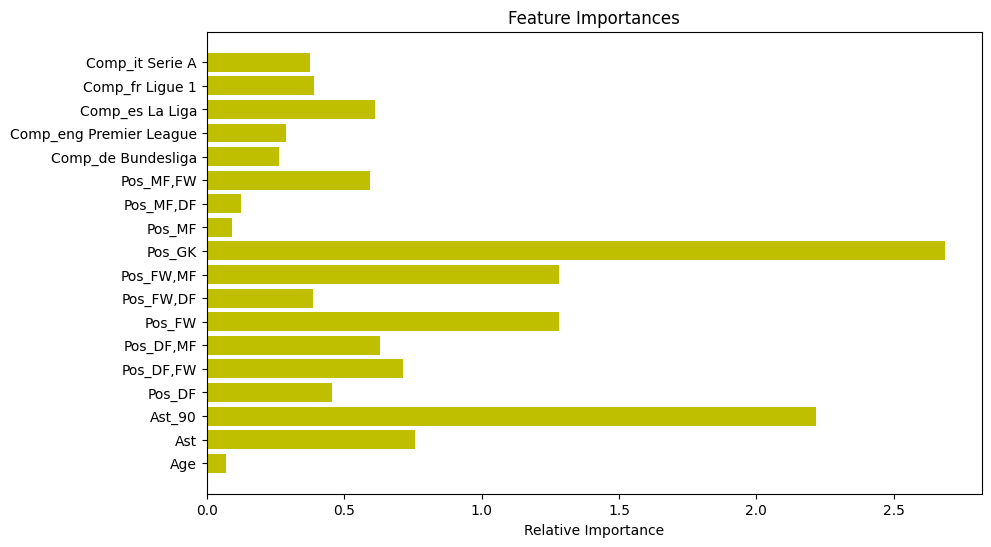

In [518]:
importances = abs(log_model.coef_)[::-1]
indices = np.argsort(-importances)

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(X_train.shape[1]), importances[0], align="center", color="y")
plt.yticks(range(X_train.shape[1]), X_train.columns)
plt.xlabel("Relative Importance")
plt.show()


# Decision tree (categorical tree)

## Training

In [519]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [520]:
dt_model

DecisionTreeClassifier()

## Prediction

In [521]:
y_pred = dt_model.predict(X_test)

In [522]:
y_test.value_counts()


Gls
False    405
True     166
Name: count, dtype: int64

## Confusion Matrix

Accuracy: 0.7583187390542907
              precision    recall  f1-score   support

       False       0.82      0.84      0.83       405
        True       0.59      0.55      0.57       166

    accuracy                           0.76       571
   macro avg       0.71      0.70      0.70       571
weighted avg       0.75      0.76      0.76       571



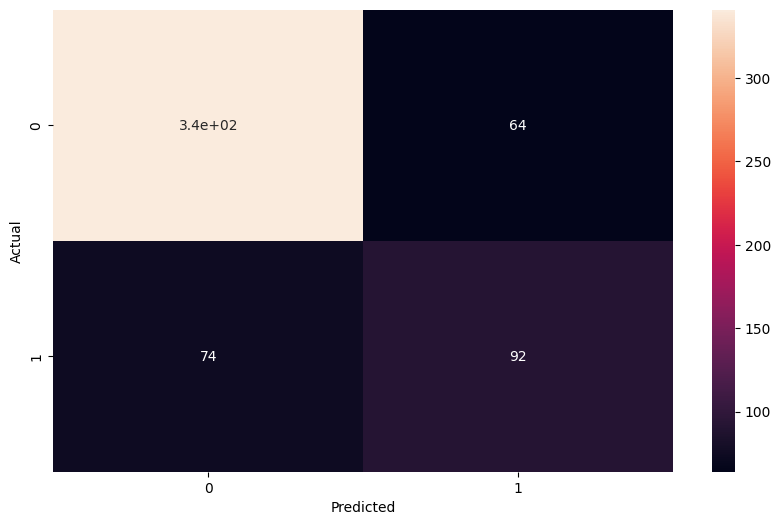

In [523]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, ax=ax)
_ = plt.xlabel("Predicted")
_ = plt.ylabel("Actual")

print(classification_report(y_test, y_pred))

## ROC AUC

In [524]:
ROC_AUC_SCORE4 = roc_auc_score(y_test, y_pred)
ROC_AUC_SCORE4

np.float64(0.6980960880559275)

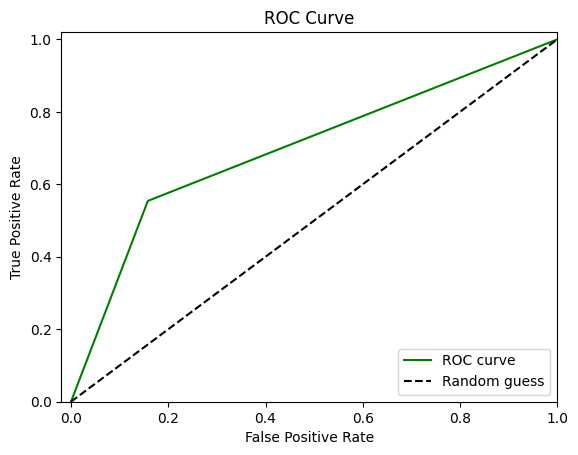

In [525]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC curve', color='g')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")
plt.show()

## Exploring Hyperparameters

In [526]:
# Definir el rango de hiperparámetros a explorar
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Configurar Grid Search con Cross Validation
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar el GridSearchCV a los datos de entrenamiento
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [527]:
# Imprimir los mejores hiperparámetros y la mejor puntuación usando el objeto grid_search
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor puntuación de validación cruzada:", grid_search.best_score_)

Mejores hiperparámetros: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mejor puntuación de validación cruzada: 0.8084110714422819


## Accuracy

In [528]:
accuracy4 = accuracy_score(y_test, y_pred)
accuracy4

0.7583187390542907

## Precision

In [529]:
precision4 = precision_score(y_test, y_pred)
precision4

np.float64(0.5897435897435898)

## Feature importances

In [530]:
X_train.columns

Index(['Age', 'Ast', 'Ast_90', 'Pos_DF', 'Pos_DF,FW', 'Pos_DF,MF', 'Pos_FW',
       'Pos_FW,DF', 'Pos_FW,MF', 'Pos_GK', 'Pos_MF', 'Pos_MF,DF', 'Pos_MF,FW',
       'Comp_de Bundesliga', 'Comp_eng Premier League', 'Comp_es La Liga',
       'Comp_fr Ligue 1', 'Comp_it Serie A'],
      dtype='object')

In [531]:
dt_model.feature_importances_

array([0.18922312, 0.28183442, 0.20426675, 0.06056607, 0.00468922,
       0.00382751, 0.044692  , 0.00779704, 0.02937177, 0.00648983,
       0.01602542, 0.01480946, 0.02178223, 0.0162667 , 0.02610282,
       0.02048754, 0.02881557, 0.02295254])

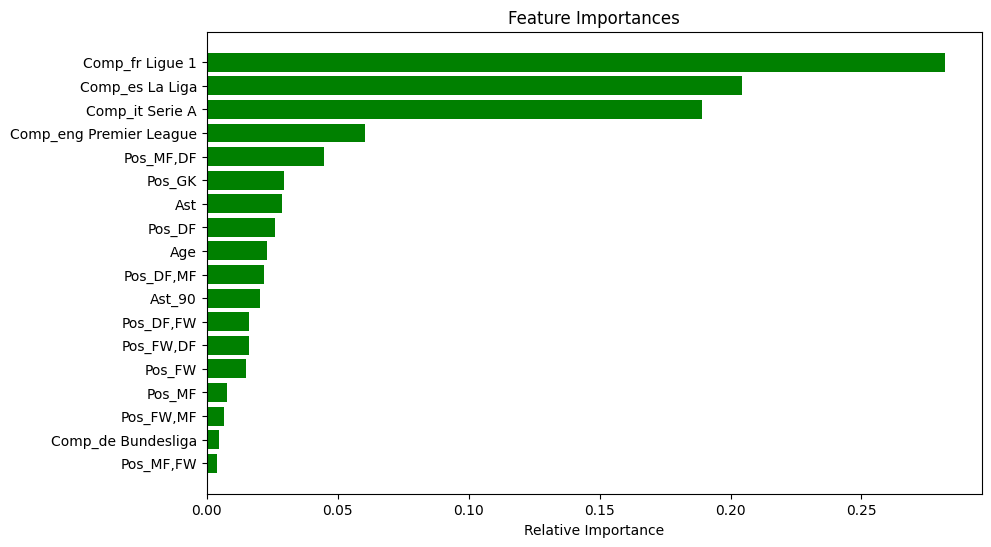

In [532]:
importances = dt_model.feature_importances_[::-1]
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(X_train.shape[1]), importances[indices], align="center", color="g")
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlabel("Relative Importance")
plt.show()

## Compraración de modelos

In [533]:
# Creacion pd.Dataframe para comprarar metricas de los 4 modelos
data = {
    "Model": ["Logistic Regression (#)", "Decision Tree (#)", "Logistic Regression (# y ABC)", "Decision Tree (# y ABC)"],
    "Accuracy": [accuracy1, accuracy2, accuracy3, accuracy4],
    "Precision": [precision1, precision2, precision3, precision4],
    "ROC AUC Score": [ROC_AUC_SCORE1, ROC_AUC_SCORE2, ROC_AUC_SCORE3, ROC_AUC_SCORE4]
}
# Crear df
df = pd.DataFrame(data)
df

,Model,Accuracy,Precision,ROC AUC Score
0,Logistic Regression (#),0.774081,0.679612,0.670103
1,Decision Tree (#),0.744308,0.583333,0.649115
2,Logistic Regression (# y ABC),0.809107,0.735537,0.728566
3,Decision Tree (# y ABC),0.758319,0.589744,0.698096


En base al dataframe de la celda anterior, se puede deducir que el mejor modelo de los 4 es la regresión logística combinando datos numericos y categoricos.